# import necessary libraries

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from imblearn.over_sampling import RandomOverSampler
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.svm import SVR
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score,accuracy_score,f1_score

# load the data

In [2]:
data = pd.read_csv("C:/Users/rsred/Downloads/Redwine quality .csv")

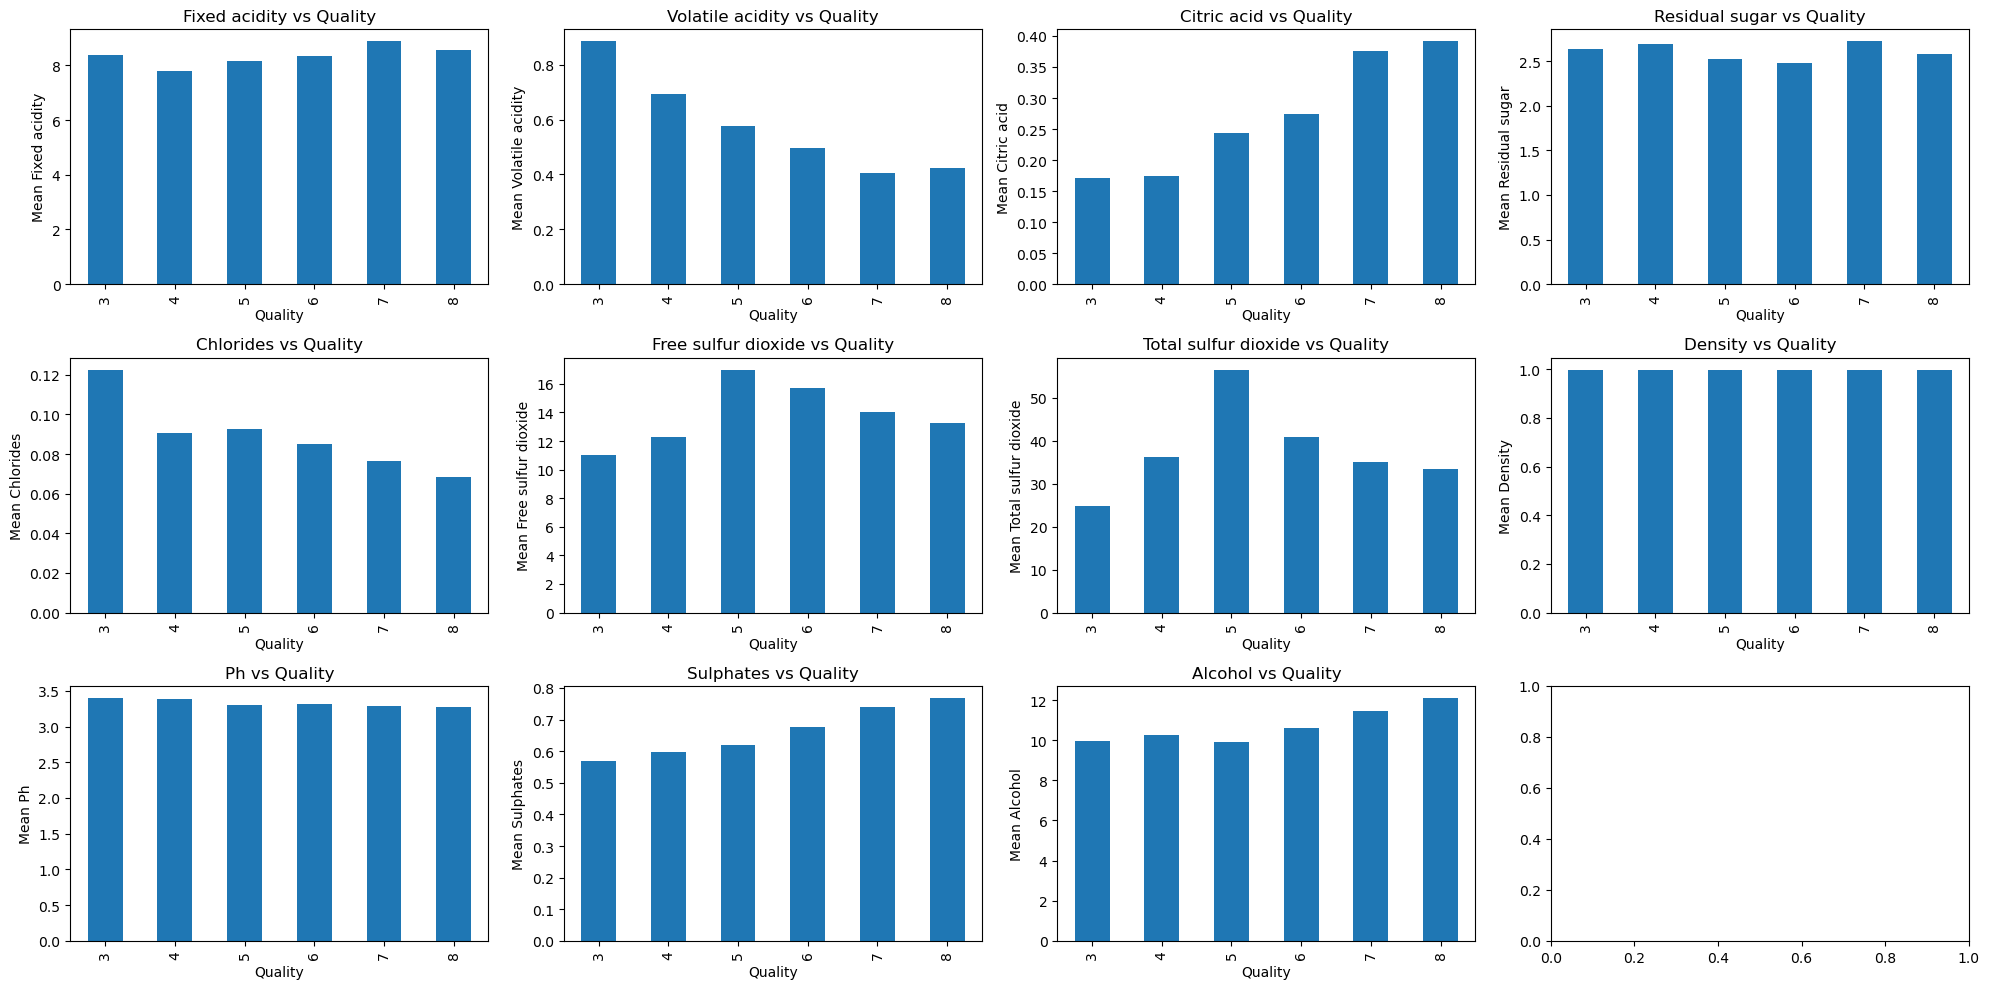

In [3]:
import matplotlib.pyplot as plt

fig, axs = plt.subplots(nrows=3, ncols=4, figsize=(20, 10))

for i, ax in enumerate(axs.flat):
    if i < len(data.columns[:-1]):
        col = data.columns[:-1][i]
        data.groupby(['quality'])[col].mean().plot(kind='bar', ax=ax)
        ax.set_title(f"{col.capitalize()} vs Quality")
        ax.set_xlabel('Quality')
        ax.set_ylabel(f"Mean {col.capitalize()}")

plt.tight_layout()
plt.show()

In [4]:
data.shape

(1599, 12)

In [5]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1599 entries, 0 to 1598
Data columns (total 12 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   fixed acidity         1599 non-null   float64
 1   volatile acidity      1599 non-null   float64
 2   citric acid           1599 non-null   float64
 3   residual sugar        1599 non-null   float64
 4   chlorides             1599 non-null   float64
 5   free sulfur dioxide   1599 non-null   int64  
 6   total sulfur dioxide  1599 non-null   int64  
 7   density               1599 non-null   float64
 8   pH                    1599 non-null   float64
 9   sulphates             1599 non-null   float64
 10  alcohol               1599 non-null   float64
 11  quality               1599 non-null   int64  
dtypes: float64(9), int64(3)
memory usage: 150.0 KB


In [6]:
# check for missing values and handle them if necessary
data.isnull().sum()

fixed acidity           0
volatile acidity        0
citric acid             0
residual sugar          0
chlorides               0
free sulfur dioxide     0
total sulfur dioxide    0
density                 0
pH                      0
sulphates               0
alcohol                 0
quality                 0
dtype: int64

In [7]:
data.describe()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
count,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000
mean,8.319637,0.527821,0.270976,2.538806,0.087467,15.875547,46.468418,0.996747,3.311113,0.658149,10.422983,5.636023
std,1.741096,0.179060,0.194801,1.409928,0.047065,10.460434,32.895920,0.001887,0.154386,0.169507,1.065668,0.807569
min,4.600000,0.120000,0.000000,0.900000,0.012000,1.000000,6.000000,0.990070,2.740000,0.330000,8.400000,3.000000
25%,7.100000,0.390000,0.090000,1.900000,0.070000,7.000000,22.000000,0.995600,3.210000,0.550000,9.500000,5.000000
50%,7.900000,0.520000,0.260000,2.200000,0.079000,14.000000,38.000000,0.996750,3.310000,0.620000,10.200000,6.000000
75%,9.200000,0.640000,0.420000,2.600000,0.090000,21.000000,62.000000,0.997835,3.400000,0.730000,11.100000,6.000000
max,15.900000,1.580000,1.000000,15.500000,0.611000,72.000000,289.000000,1.003690,4.010000,2.000000,14.900000,8.000000


# Check Correlation b/w features using heatmap

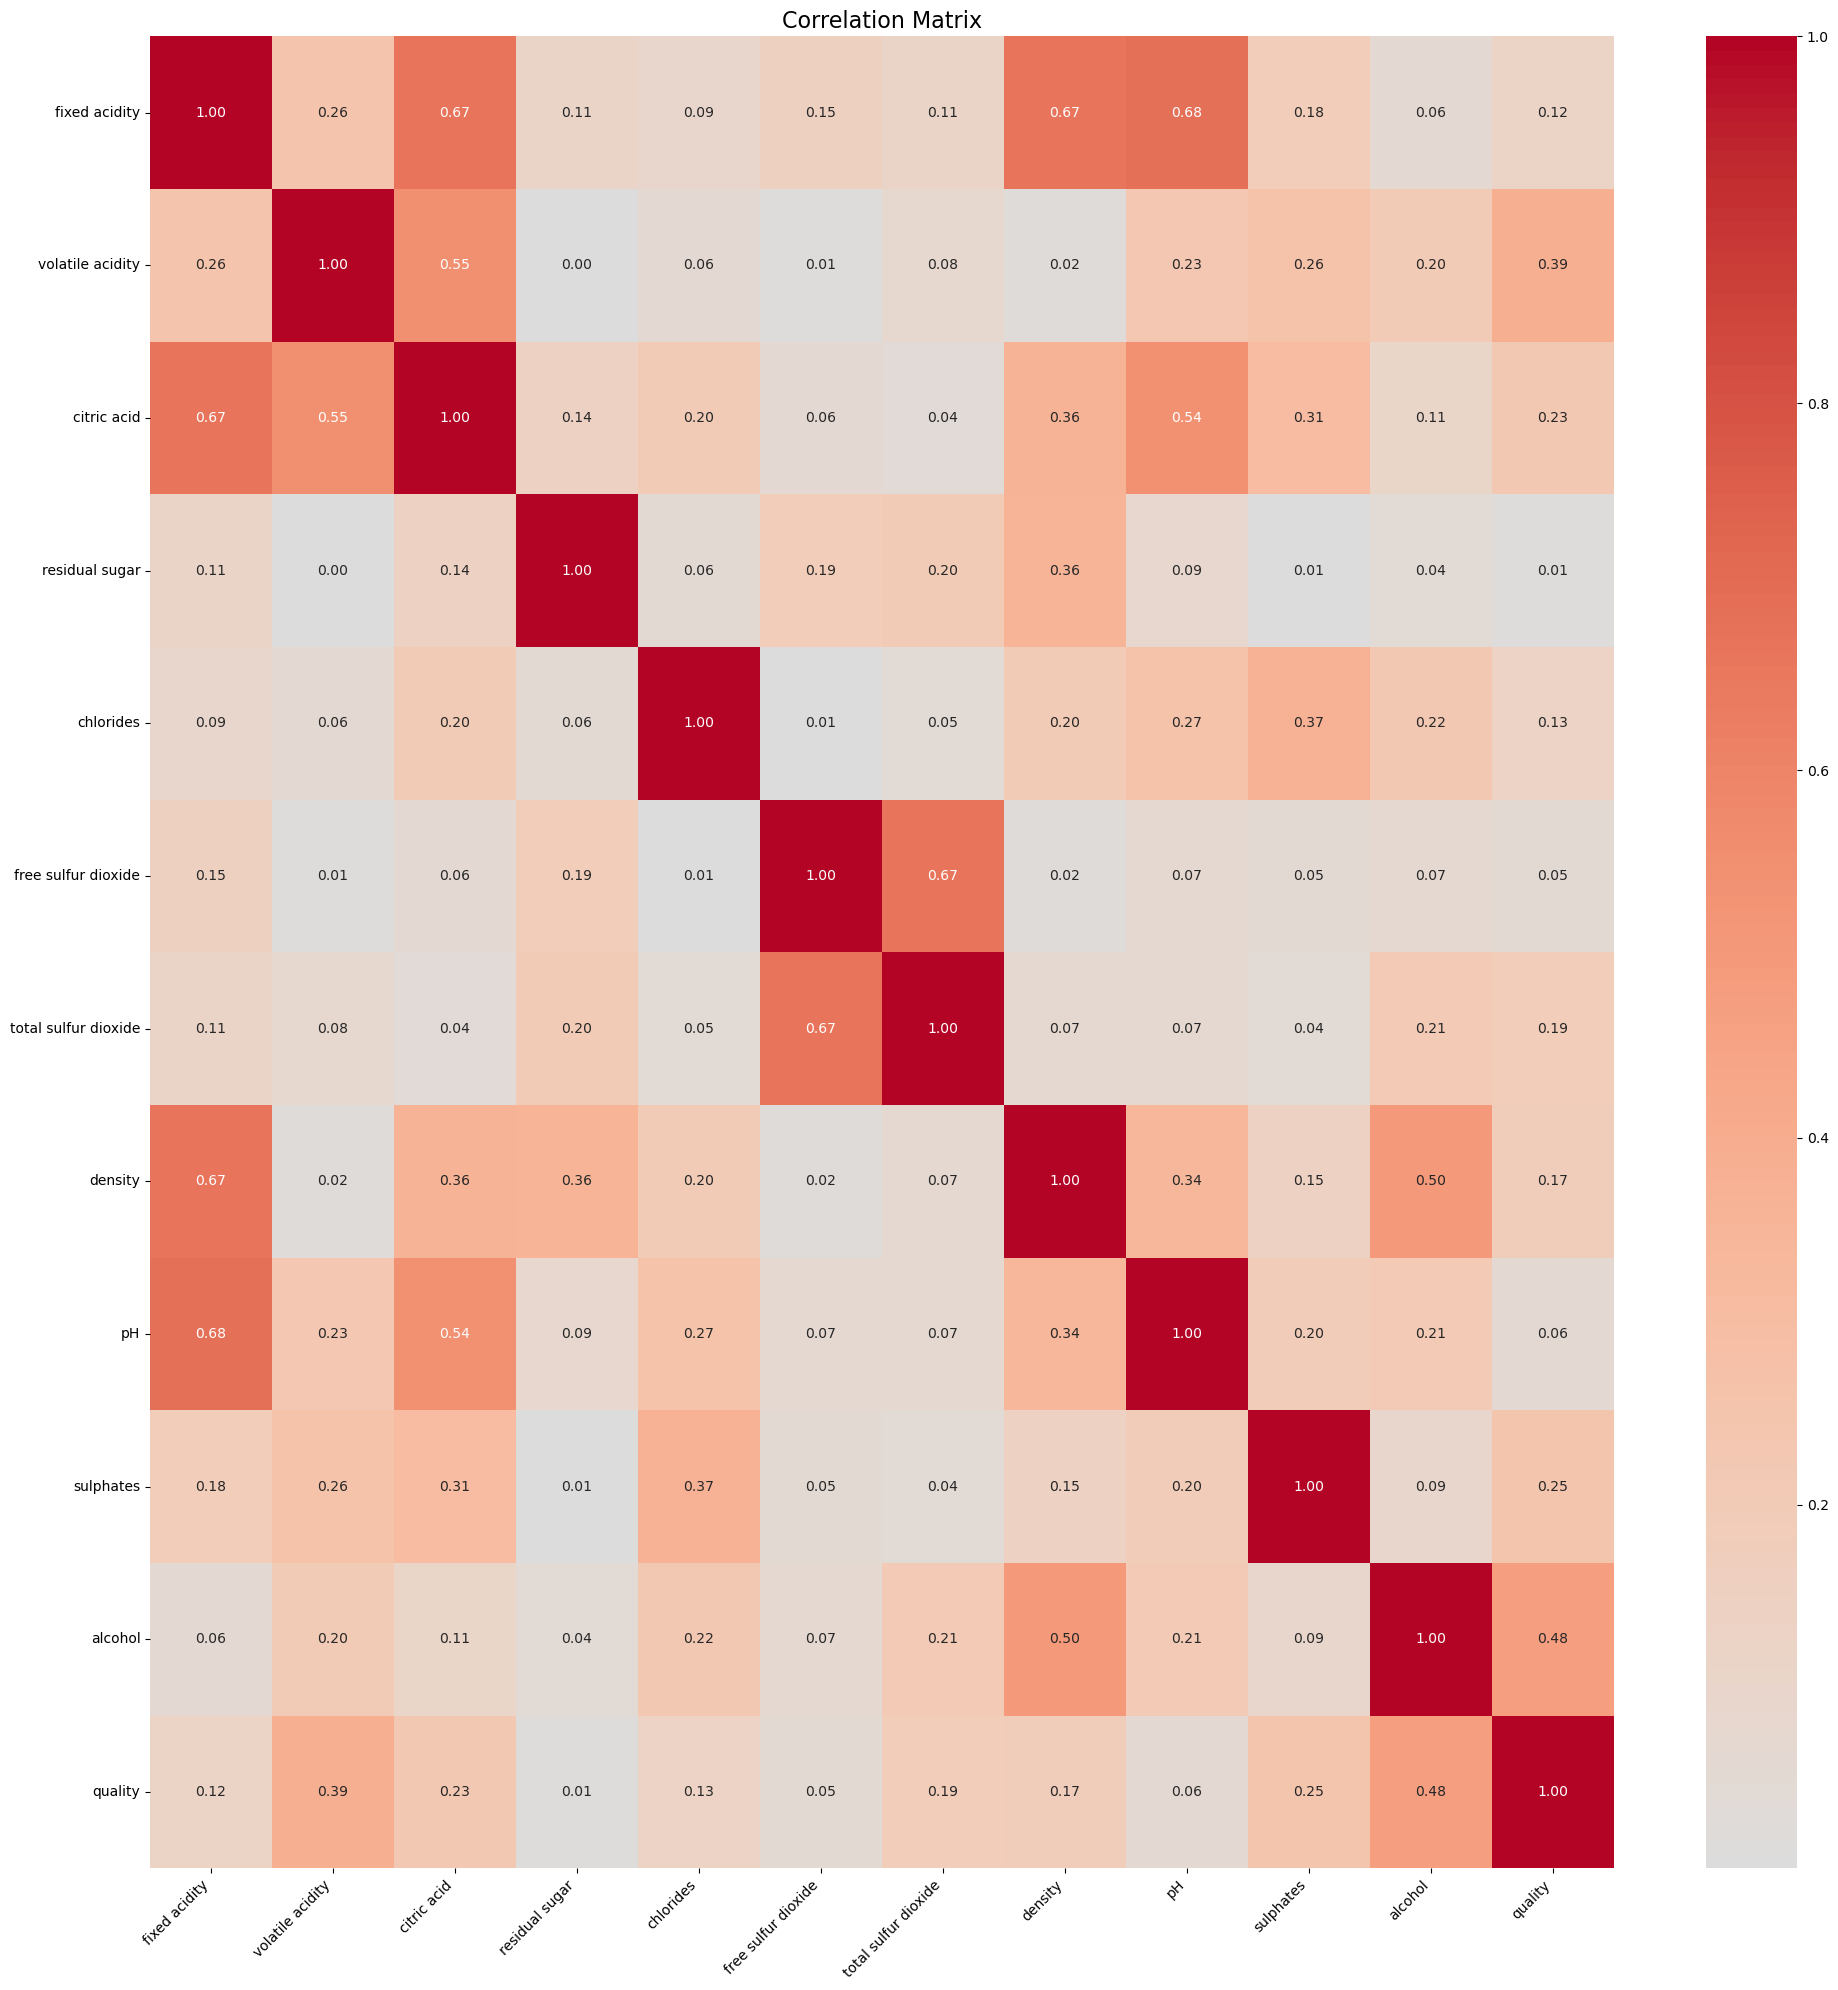

In [8]:
# Compute correlation matrix
corr_matrix = data.corr().abs()

# Create heatmap for correlation matrix
fig, ax = plt.subplots(figsize=(20, 20))
sns.heatmap(corr_matrix, cmap='coolwarm', annot=True, fmt='.2f', center=0, ax=ax)
ax.set_title('Correlation Matrix', fontsize=16)
plt.xticks(rotation=45, ha='right')
plt.yticks(rotation=0)
plt.tight_layout()
#plt.savefig("/Users/duuuuuuuuke/Documents/Grad School/MSC 641/correlation.png")
plt.show()

# Convert target variable to binary and Check class distribution

In [9]:
data['quality'].unique()

array([5, 6, 7, 4, 8, 3], dtype=int64)

In [10]:
data['quality'].value_counts()

5    681
6    638
7    199
4     53
8     18
3     10
Name: quality, dtype: int64

In [11]:
data['quality']=[1 if x>=7 else 0 for x in data['quality']]

In [12]:
data['quality'].unique()

array([0, 1], dtype=int64)

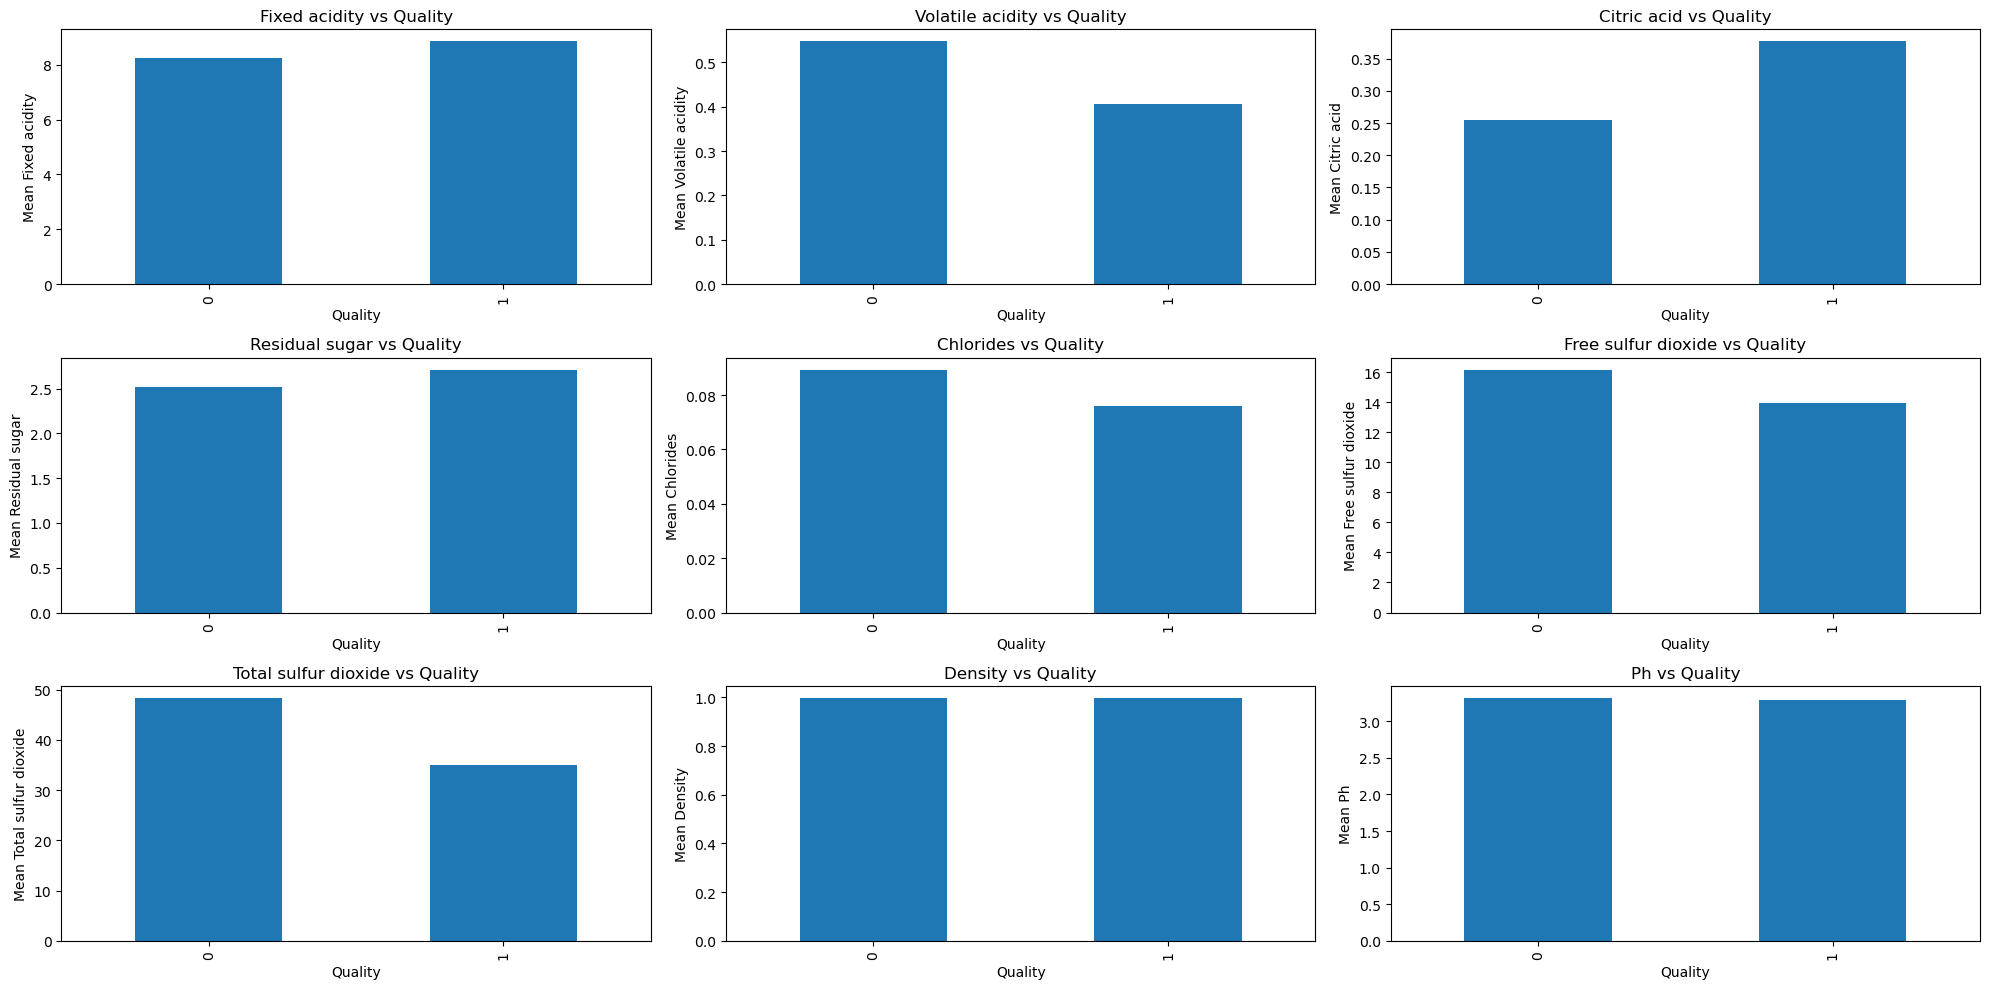

In [13]:
import matplotlib.pyplot as plt

fig, axs = plt.subplots(nrows=3, ncols=3, figsize=(20, 10))

for i, ax in enumerate(axs.flat):
    if i < len(data.columns[:-1]):
        col = data.columns[:-1][i]
        data.groupby(['quality'])[col].mean().plot(kind='bar', ax=ax)
        ax.set_title(f"{col.capitalize()} vs Quality")
        ax.set_xlabel('Quality')
        ax.set_ylabel(f"Mean {col.capitalize()}")

plt.tight_layout()
plt.show()

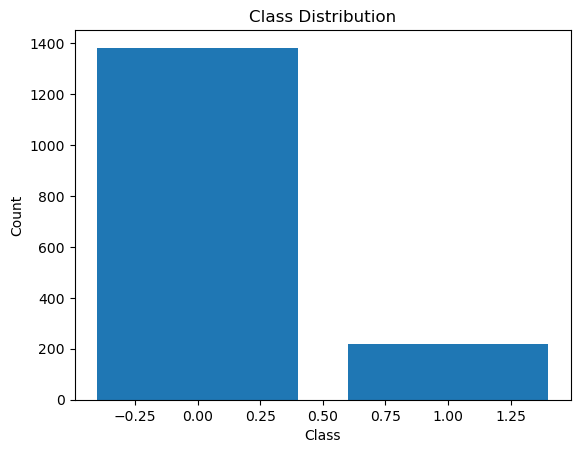

Class Distribution:
0    1382
1     217
Name: quality, dtype: int64

Percentage of Each Class:
0    86.429018
1    13.570982
Name: quality, dtype: float64


In [14]:
# Get the count of each class
class_count = data['quality'].value_counts()

# Create a bar plot to visualize the class distribution
plt.bar(class_count.index, class_count.values)
plt.title('Class Distribution')
plt.xlabel('Class')
plt.ylabel('Count')
plt.show()

# Calculate the percentage of each class
class_percentages = class_count / len(data) * 100

print("Class Distribution:")
print(class_count)
print("\nPercentage of Each Class:")
print(class_percentages)

# Split the data into train and test sets and Handling Class Imbalance

In [15]:
# Split the data into training and testing sets
x = data.drop('quality',axis=1)
y = data['quality']
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)

In [16]:
from imblearn.over_sampling import SMOTE
X_res,y_res = SMOTE().fit_resample(x_train,y_train)
y_res.value_counts()

0    1109
1    1109
Name: quality, dtype: int64

# scale the data

In [19]:
# Scale the data
scaler = StandardScaler()
x_train = scaler.fit_transform(x_train)
x_test = scaler.transform(x_test)

# Applying PCA

In [20]:
from sklearn.decomposition import PCA
pca = PCA(n_components=0.90)
x_train = pca.fit_transform(x_train)
x_test = pca.transform(x_test)

In [21]:
sum(pca.explained_variance_ratio_)

0.9081950548246704

In [22]:
pca.explained_variance_ratio_

array([0.28017635, 0.17565914, 0.13957862, 0.11081885, 0.09020956,
       0.05908763, 0.05266491])

# Algorithms

In [23]:
# KNeighbors Classifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import precision_score,recall_score,f1_score,accuracy_score

knn = KNeighborsClassifier()
knn.fit(x_train,y_train)
KNeighborsClassifier()
y_pred2 = knn.predict(x_test)
print('Accuracy:', accuracy_score(y_test,y_pred2))
print('Precision Score:', precision_score(y_test,y_pred2))
print('Recall Score:', recall_score(y_test,y_pred2))
print('F1 Score:', f1_score(y_test,y_pred2))

Accuracy: 0.884375
Precision Score: 0.6666666666666666
Recall Score: 0.425531914893617
F1 Score: 0.5194805194805194


In [24]:
# Decision Tree Classifier
from sklearn.tree import DecisionTreeClassifier

dt =DecisionTreeClassifier()
dt.fit(x_train,y_train)
DecisionTreeClassifier()
y_pred3 = dt.predict(x_test)
print('Accuracy:', accuracy_score(y_test,y_pred3))
print('Precision Score:', precision_score(y_test,y_pred3))
print('Recall Score:', recall_score(y_test,y_pred3))
print('F1 Score:', f1_score(y_test,y_pred3))

Accuracy: 0.840625
Precision Score: 0.46296296296296297
Recall Score: 0.5319148936170213
F1 Score: 0.495049504950495


In [25]:
# Random Forest Classifier
from sklearn.ensemble import RandomForestClassifier
rf = RandomForestClassifier()
rf.fit(x_train,y_train)
RandomForestClassifier()
y_pred4 = rf.predict(x_test)
print('Accuracy:', accuracy_score(y_test,y_pred4))
print('Precision Score:', precision_score(y_test,y_pred4))
print('Recall Score:', recall_score(y_test,y_pred4))
print('F1 Score:', f1_score(y_test,y_pred4))

Accuracy: 0.90625
Precision Score: 0.8148148148148148
Recall Score: 0.46808510638297873
F1 Score: 0.5945945945945945


In [26]:
# SVC
from sklearn.svm import SVC
svm = SVC()
svm.fit(x_train, y_train)
y_pred5 = svm.predict(x_test)
print('Accuracy:', accuracy_score(y_test, y_pred5))
print('Precision Score:', precision_score(y_test, y_pred5))
print('Recall Score:', recall_score(y_test, y_pred5))
print('F1 Score:', f1_score(y_test, y_pred5))

Accuracy: 0.86875
Precision Score: 0.6470588235294118
Recall Score: 0.23404255319148937
F1 Score: 0.34375


In [27]:
from sklearn.model_selection import GridSearchCV

# Define the parameter grid
param_grid = {
    'n_estimators': [100, 200, 300],
    'max_depth': [5, 10, 15],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4],
    'max_features': ['sqrt', 'log2']
}

# Create a random forest regressor
rf = RandomForestClassifier()

# Create a grid search object
grid_search = GridSearchCV(estimator=rf, param_grid=param_grid, cv=10, n_jobs=-1)

# Fit the grid search to the data
grid_search.fit(x_train, y_train)

# Print the best hyperparameters and the corresponding mean cross-validation score
print('Best hyperparameters:', grid_search.best_params_)
print('Best score:', grid_search.best_score_)

Best hyperparameters: {'max_depth': 15, 'max_features': 'sqrt', 'min_samples_leaf': 1, 'min_samples_split': 2, 'n_estimators': 200}
Best score: 0.8999323326771653


In [28]:
from sklearn.ensemble import RandomForestClassifier

# Create a random forest regressor with the best hyperparameters
rf = RandomForestClassifier(n_estimators=300, max_depth=15, min_samples_split=2, min_samples_leaf=1, max_features='log2')

# Fit the random forest regressor to the training data
rf.fit(x_train, y_train)

# Make predictions on the test data
y_pred6 = rf.predict(x_test)

print('Accuracy:', accuracy_score(y_test, y_pred6))
print('Precision Score:', precision_score(y_test, y_pred6))
print('Recall Score:', recall_score(y_test, y_pred6))
print('F1 Score:', f1_score(y_test, y_pred6))

Accuracy: 0.903125
Precision Score: 0.7857142857142857
Recall Score: 0.46808510638297873
F1 Score: 0.5866666666666668


In [29]:
final_data = pd.DataFrame({'Models':['KNN','DT','RF','SVC', 'Best_RF'],
             'ACC':[accuracy_score(y_test,y_pred2)*100,
                   accuracy_score(y_test,y_pred3)*100,
                   accuracy_score(y_test,y_pred4)*100,
                   accuracy_score(y_test,y_pred5)*100,
                   accuracy_score(y_test,y_pred6)*100]})
final_data

,Models,ACC
0,KNN,88.4375
1,DT,84.0625
2,RF,90.6250
3,SVC,86.8750
4,Best_RF,90.3125


c:\Users\koter\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='Models', ylabel='ACC'>

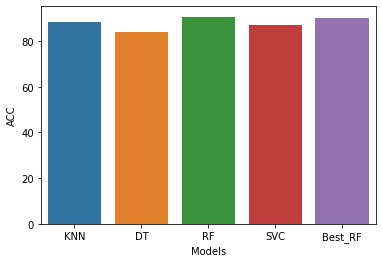

In [30]:
import seaborn as sns
sns.barplot(final_data['Models'],final_data['ACC'])

# Prediction of Quality

In [35]:
from sklearn.metrics import classification_report

# Load the original white wine test data
x_red_test = pd.read_csv("C:/Users/rsred/Downloads/winequality-redtest.csv")
x_red_test['quality']=[1 if x>=7 else 0 for x in x_red_test['quality']]

y = x_red_test['quality']
x = x_red_test.drop('quality', axis=1)

# Split the data into training and testing sets
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)

# Resample the data to address class imbalance
x_res, y_res = SMOTE(k_neighbors=3).fit_resample(x_train, y_train)

# Scale the data
scaler = StandardScaler()
x_train = scaler.fit_transform(x_train)
x_test = scaler.transform(x_test)

# Apply PCA to reduce dimensionality
pca = PCA(n_components=0.90)
x_train = pca.fit_transform(x_train)
x_test = pca.transform(x_test)

# Train a random forest classifier on the reduced dataset
rf.fit(x_train, y_train)

# Make predictions using the best model
y_pred = rf.predict(x_test)

# Print classification report
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.92      0.99      0.95       273
           1       0.85      0.49      0.62        47

    accuracy                           0.91       320
   macro avg       0.88      0.74      0.79       320
weighted avg       0.91      0.91      0.90       320

